In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as ml
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
ml.style.use('fivethirtyeight')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,f1_score

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pima-indians-diabetes-database/diabetes.csv


In [3]:
data = pd.read_csv('/kaggle/input/pima-indians-diabetes-database/diabetes.csv')
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Building the model

For X : Training : (614, 8) ; Testing : (154, 8)

For Y : Training : (614,) ; Testing : (154,)


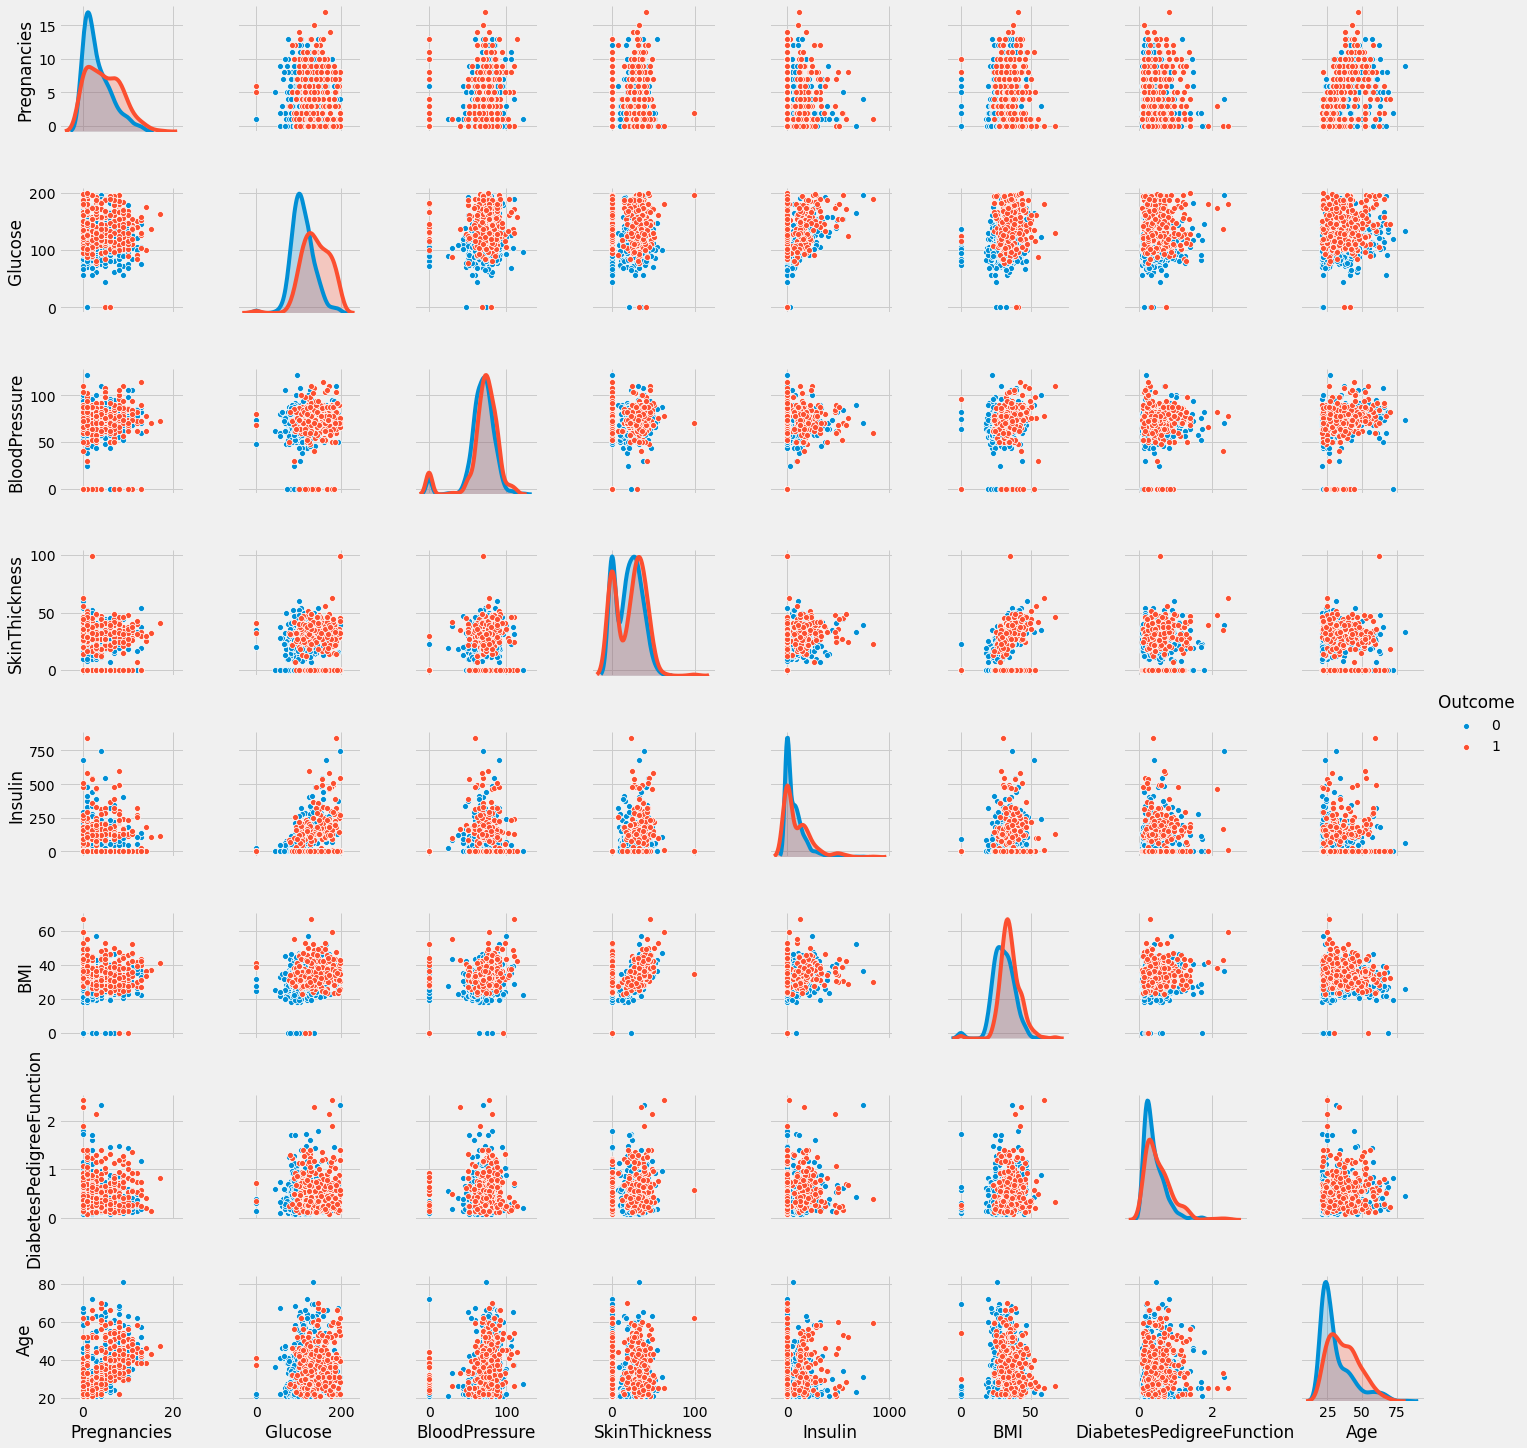

In [6]:
X = np.array(data.iloc[:,:-1].values)
Y = np.array(data.iloc[:,-1].values)
trainx,testx,trainy,testy = train_test_split(X,Y,test_size=0.2,random_state=0)
# Scaling
sc = StandardScaler()
trainx,testx = sc.fit_transform(trainx),sc.fit_transform(testx)

print("For X : Training : {} ; Testing : {}".format(trainx.shape,testx.shape))
print("\nFor Y : Training : {} ; Testing : {}".format(trainy.shape,testy.shape))

sns.pairplot(data,hue='Outcome')
plt.show()

In [51]:
# RBF Kernel
m=50
accuracy,recall,f1 = [],[],[]
x_axis = [i for i in range(1,m)]
for i in range(1,m):
    svm_c = SVC(kernel='rbf',C=i,gamma='auto')
    svm_c.fit(trainx,trainy)
    y_pred_i = svm_c.predict(testx)
    accuracy.append(accuracy_score(testy,y_pred_i))
    recall.append(recall_score(testy,y_pred_i))
    f1.append(f1_score(testy,y_pred_i))
    print("For C = {},".format(i),"confusion matrix : \n",confusion_matrix(testy,y_pred_i),"\n")

For C = 1, confusion matrix : 
 [[96 11]
 [19 28]] 

For C = 2, confusion matrix : 
 [[94 13]
 [21 26]] 

For C = 3, confusion matrix : 
 [[92 15]
 [20 27]] 

For C = 4, confusion matrix : 
 [[91 16]
 [22 25]] 

For C = 5, confusion matrix : 
 [[90 17]
 [21 26]] 

For C = 6, confusion matrix : 
 [[90 17]
 [18 29]] 

For C = 7, confusion matrix : 
 [[90 17]
 [18 29]] 

For C = 8, confusion matrix : 
 [[90 17]
 [18 29]] 

For C = 9, confusion matrix : 
 [[90 17]
 [18 29]] 

For C = 10, confusion matrix : 
 [[90 17]
 [18 29]] 

For C = 11, confusion matrix : 
 [[91 16]
 [17 30]] 

For C = 12, confusion matrix : 
 [[91 16]
 [17 30]] 

For C = 13, confusion matrix : 
 [[89 18]
 [17 30]] 

For C = 14, confusion matrix : 
 [[89 18]
 [16 31]] 

For C = 15, confusion matrix : 
 [[89 18]
 [16 31]] 

For C = 16, confusion matrix : 
 [[90 17]
 [17 30]] 

For C = 17, confusion matrix : 
 [[89 18]
 [17 30]] 

For C = 18, confusion matrix : 
 [[90 17]
 [17 30]] 

For C = 19, confusion matrix : 
 [[90

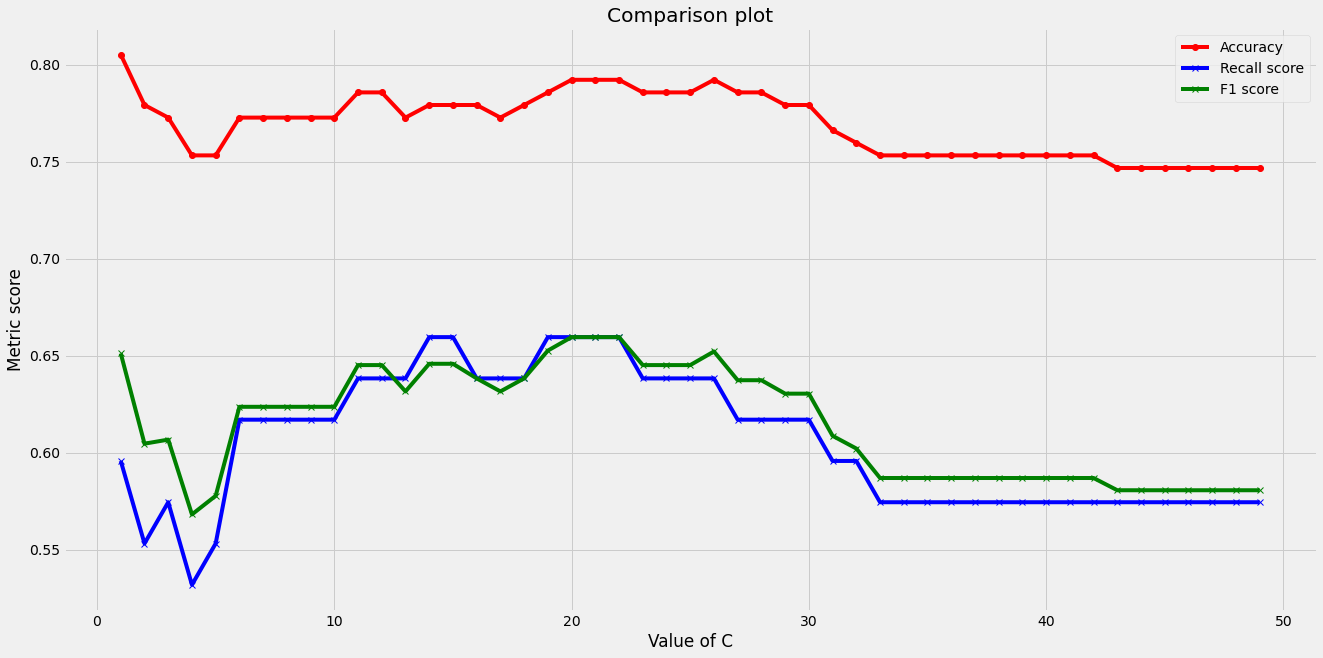

In [52]:
plt.figure(figsize=(20,10))
plt.plot(x_axis,accuracy,color='red',marker='o',label='Accuracy')
plt.plot(x_axis,recall,color='blue',marker='x',label='Recall score')
plt.plot(x_axis,f1,color='green',marker='x',label='F1 score')
plt.legend()
plt.xlabel("Value of C")
plt.ylabel("Metric score")
plt.title("Comparison plot")
plt.show()

In [53]:
print("METRIC : ACCURACY\nHighest accuracy is obtained for C = {}, and the accuracy is = {}".format(np.argmax(accuracy)+1,accuracy[np.argmax(accuracy)]))
print("\nMETRIC : RECALL SCORE\nHighest accuracy is obtained for C = {}, and the accuracy is = {}".format(np.argmax(recall)+1,accuracy[np.argmax(recall)]))
print("\nMETRIC : F1 SCORE\nHighest accuracy is obtained for C = {}, and the accuracy is = {}".format(np.argmax(f1)+1,accuracy[np.argmax(f1)]))

METRIC : ACCURACY
Highest accuracy is obtained for C = 1, and the accuracy is = 0.8051948051948052

METRIC : RECALL SCORE
Highest accuracy is obtained for C = 14, and the accuracy is = 0.7792207792207793

METRIC : F1 SCORE
Highest accuracy is obtained for C = 20, and the accuracy is = 0.7922077922077922


### Clearly, the best value of C is = 1, for which accuracy = 0.8051